# 2110203 COMP ENG MATH II (CEDT) -- Stats Homework I

**Instructions**:
- Only ASSIGNMENT 1 and 2 will be graded. The rest are for your practise.
- Submit as PDF file. You can create PDF file using File -> Print from the Google Colab menu.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

## Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.


In [39]:
import numpy as np

def sample_uniform(sample_size, a, b):
    return np.random.uniform(low=a, high=b, size=sample_size)

def sample_normal(sample_size, mu, sigma):
    return np.random.normal(loc=mu, scale=sigma, size=sample_size)

def sample_bernoulli(sample_size, p):
    return np.random.binomial(n=1, p=p, size=sample_size)

def sample_binomial(sample_size, n, p):
    return np.random.binomial(n=n, p=p, size=sample_size)

def sample_geometric(sample_size, p):
    return np.random.geometric(p=p, size=sample_size)

def sample_exponential(sample_size, l):
    return np.random.exponential(scale=1/l, size=sample_size)

def sample_increasing(sample_size):
    u_values = np.random.uniform(0, 1, sample_size)
    return np.sqrt(200 * u_values)


In [40]:
def plot_histogram(data):
  plt.hist(data)

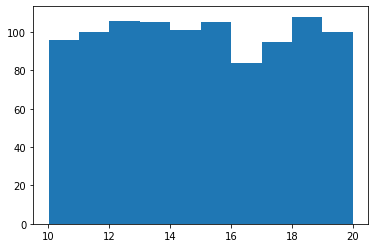

In [41]:
plot_histogram(sample_uniform(1000, 10, 20))

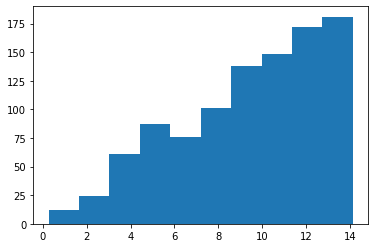

In [42]:
plot_histogram(sample_increasing(1000))

### Problem 0

Try playing with the sample size and see how the histogram change with each run. Check if the result match what you think. Explain in detail.

## Maximum Likelihood Estimation

### Problem 1

Machines in Hamtaro’s factory have their lifetime modelled by exponential distribution with an unknown parameter. Hamtaro found out that his machines failed after $x_1, x_2, ..., x_n$ years. Estimate the unknown parameter.

In [43]:
machine_failed_time = [2, 3, 1, 3, 4]   # In class example
# machine_failed_time = sample_exponential(5, 0.3)  # Sampled from exponential distribution

def prob1_mle(X):
  return len(X)/np.sum(X)

print('The estimated parameter is: {}'.format(prob1_mle(machine_failed_time)))

The estimated parameter is: 0.38461538461538464


### Problem 2

The number of attempts for the STATS COMP ENG class before passing following a Geometric distribution with unknown parameter. $n$ students failed $x_1, x_2, ..., x_n$ times before passing. Find the MLE of the parameter.

In [44]:
X = [0, 0, 2]
# X = sample_geometric(10, 0.9)   # Sample from actual geometric distribution

def prob2_mle(X):
  total = 0
  for x in X:
      total += x
  mean_X = total / len(X)
  mle_p = 1 / (1 + mean_X)
  return mle_p

print('The MLE is {}'.format(prob2_mle(X)))

The MLE is 0.6000000000000001


### Problem 3

Suppose our data $x_1, x_2, ..., x_n$ is randomly drawn from uniform distribution $U(a,b)$. Find MLE of $a$ and $b$.

In [45]:
X = sample_uniform(100, 60, 78)

def prob3_mle(X):
    a = np.min(X)
    b = np.max(X)
    return a,b

a, b = prob3_mle(X)
print('The MLE is ({:.2f}, {:.2f})'.format(a, b))

The MLE is (60.15, 77.90)


## Maximum A Posteriori Estimation

### Problem 4

Toss an unknown coin $n$ times. The result has a head $h$ times. Koshi-kun told us that there are three possible coins:

- Coin A – P[H] = $c_a$
- Coin B – P[H] = $c_b$
- Coin C – P[H] = $c_c$

Koshi-kun also told us A, B, C has probability of being the coin with probability $p_a, p_b, p_c$, respectively. Find the MAP estimate.

In [46]:
num_coin = 3
coin_head_prob = [0.8, 0.5, 0.4]
coin_select_prob = [0.4, 0.4, 0.2]
n = 5
h = 2

In [47]:
from math import comb

def coin_posterior(n, h, head_prob, select_prob):
  # ASSIGNMENT 2
  # [YOUR CODE HERE]
  likelihood = comb(n, h)*(head_prob** h) * ((1 - head_prob) ** (n - h))
  posterior = likelihood*select_prob
  return posterior

p_map = 0
p_map_val = 0
for i in range(num_coin):
  posterior = coin_posterior(n, h, coin_head_prob[i], coin_select_prob[i])
  print('Coint {} has posterior of {}'.format(i, posterior))
  if posterior > p_map_val:
    p_map_val = posterior
    p_map = coin_head_prob[i]

print()
print('The estimated parameter is {}'.format(p_map))

Coint 0 has posterior of 0.02047999999999999
Coint 1 has posterior of 0.125
Coint 2 has posterior of 0.06912

The estimated parameter is 0.5


### Problem 5

From https://xkcd.com/1132/. Assume that chance of the sun actually explode is $10^{-6}$. What are the chance that the machine said the sun exploded when it actually isn't?

In [49]:
from scipy.stats import bernoulli

sun_prior = 1e-6
lie_prob = 1/36

def check_sun():
    sun_exploded = bernoulli.rvs(sun_prior)
    if sun_exploded:
        return True
    else:
        lie = bernoulli.rvs(lie_prob)
        if lie:
            return True
        else:
            return False

count_exploded = 0
ask_times = 1000000
for i in range(ask_times):
    if check_sun():
        count_exploded += 1

print('The sun exploded {} times.'.format(count_exploded))
print('Explode rate: {}'.format(count_exploded / ask_times))

AttributeError: 'function' object has no attribute 'rvs'

### Problem 6

Go back to problem 2-5, and try to play with input size and parameter. Observe the change in result. Explain in detail.

Problem 2:
As the number of failures increases, the maximum likelihood estimate (MLE) of the probability 
𝑝
p decreases. This reflects a lower estimated chance of success per trial.

Problem 3:
Larger sample sizes result in more accurate estimates for the minimum and maximum values of the uniform distribution. The increased data provides better information about the distribution's true range.

Problem 4:
As the number of trials 
𝑛
n increases, the posterior probabilities become more definitive. More coin tosses yield clearer conclusions, making the posterior distribution more decisive. Additionally, as the number of heads 
ℎ
h increases, the coin with the highest probability of heads becomes more consistent with the data, thus increasing its likelihood.

Problem 5:
Increasing the number of simulation runs (ask_times) improves the accuracy of the estimate. Running the simulation more often leads to a more reliable result. However, increasing the lie probability (lie_prob) leads to more false reports of sun explosions, which makes it more difficult to detect the rare true sun explosions.

I use Chat GPT to rearrange the word